<a href="https://colab.research.google.com/github/zenraiching/6APPDEV/blob/master/dataset-stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
stress = pd.read_csv("dataset.csv")

In [5]:
stress.head()

,workhours,bmi,bp,age,label
0,5,25.0,75,24,0
1,8,30.2,78,25,1
2,10,18.2,78,26,1
3,12,26.0,120,24,1
4,13,25.3,126,25,1


In [6]:
#split dataset in features and target variable
feature_cols = ["workhours", "bmi", "bp", "age"]
X = stress[feature_cols] # Features
y = stress.label # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1) 

In [11]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(stress)
print()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

   workhours   bmi   bp  age  label
0          5  25.0   75   24      0
1          8  30.2   78   25      1
2         10  18.2   78   26      1
3         12  26.0  120   24      1
4         13  25.3  126   25      1
5          5  18.2   85   25      0
6          9  26.0  120   26      1
7          8  24.2  100   24      0
8         12  26.0   92   27      1
9         11  25.0  130   23      1

Accuracy: 0.5714285714285714


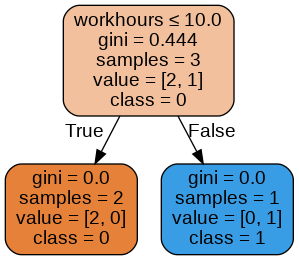

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True, special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
